In [1]:
import traceback
import os
import json
from cpitospin import analyze_cpi_structure, CPIToSPINConverter

# Choose the test
All the test available are in folder 'CPIs'

In [2]:
process_name = "test0" #choice-task-init-reverse

## Load File 

In [3]:
cpi_file_path = f'../CPIs/{process_name}.cpi'

print(f"Loading CPI file: {cpi_file_path}")

try:
	with open(cpi_file_path, 'r') as f:
		cpi_dict = json.load(f)

	print("✓ CPI file loaded successfully!")
	print(f"Root region type: {cpi_dict['type']}")
	print(f"Root region ID: {cpi_dict['id']}")

	# Pretty print the CPI structure
	print("\nCPI Structure:")
	print("=" * 50)
	print(json.dumps(cpi_dict, indent=2))

except FileNotFoundError:
	print(f"❌ File not found: {cpi_file_path}")
	print("Available files in CPIs directory:")
	try:
		for f in os.listdir('../CPIs'):
			if f.endswith('.cpi'):
				print(f"  - {f}")
	except:
		print("  Could not list CPIs directory")
except Exception as e:
	print(f"❌ Error loading CPI file: {e}")
	traceback.print_exc()

Loading CPI file: ../CPIs/test0.cpi
✓ CPI file loaded successfully!
Root region type: sequence
Root region ID: 0

CPI Structure:
{
  "type": "sequence",
  "id": 0,
  "head": {
    "type": "task",
    "id": 1,
    "duration": 2,
    "impacts": {
      "impact_1": 0.5,
      "impact_2": 0.3
    }
  },
  "tail": {
    "type": "parallel",
    "id": 2,
    "first_split": {
      "type": "sequence",
      "id": 3,
      "head": {
        "type": "task",
        "id": 4,
        "duration": 3,
        "impacts": {
          "impact_1": 0.4,
          "impact_2": 0.6
        }
      },
      "tail": {
        "type": "choice",
        "id": 5,
        "true": {
          "type": "task",
          "id": 6,
          "duration": 2,
          "impacts": {
            "impact_1": 0.3,
            "impact_2": 0.4
          }
        },
        "false": {
          "type": "task",
          "id": 7,
          "duration": 3,
          "impacts": {
            "impact_1": 0.5,
            "impact_2": 

# FROM CPI TO SPIN

In [4]:
print("\nCPI Structure Analysis:")
print("=" * 50)
if 'cpi_dict' in locals():
	analyze_cpi_structure(cpi_dict)

print("Converting CPI to SPIN...")
print("=" * 50)

try:
	converter = CPIToSPINConverter()
	spin_model = converter.convert_cpi_to_spin(cpi_dict)

	print("✓ Conversion successful!")
	print("\nSPIN Model Summary:")
	print("-" * 30)
	spin_model.print_model_summary()

except Exception as e:
	print(f"❌ Conversion failed: {e}")
	traceback.print_exc()


CPI Structure Analysis:
sequence0
  head:
    task1
      duration: 2
      impacts: {'impact_1': 0.5, 'impact_2': 0.3}
  tail:
    parallel2
      first_split:
        sequence3
          head:
            task4
              duration: 3
              impacts: {'impact_1': 0.4, 'impact_2': 0.6}
          tail:
            choice5
              true:
                task6
                  duration: 2
                  impacts: {'impact_1': 0.3, 'impact_2': 0.4}
              false:
                task7
                  duration: 3
                  impacts: {'impact_1': 0.5, 'impact_2': 0.5}
      second_split:
        sequence8
          head:
            task9
              duration: 3
              impacts: {'impact_1': 0.4, 'impact_2': 0.5}
          tail:
            nature10
              probability: 0.3
              true:
                task11
                  duration: 4
                  impacts: {'impact_1': 0.6, 'impact_2': 0.4}
              false:
                t


Creating visualizations...
✓ CPI visualization created
✓ SPIN visualization created

CPI Structure Visualization:


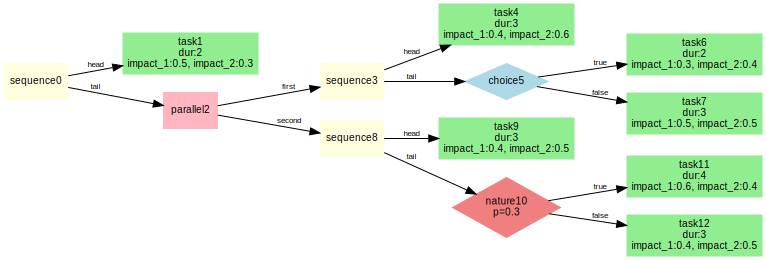


SPIN Model Visualization:


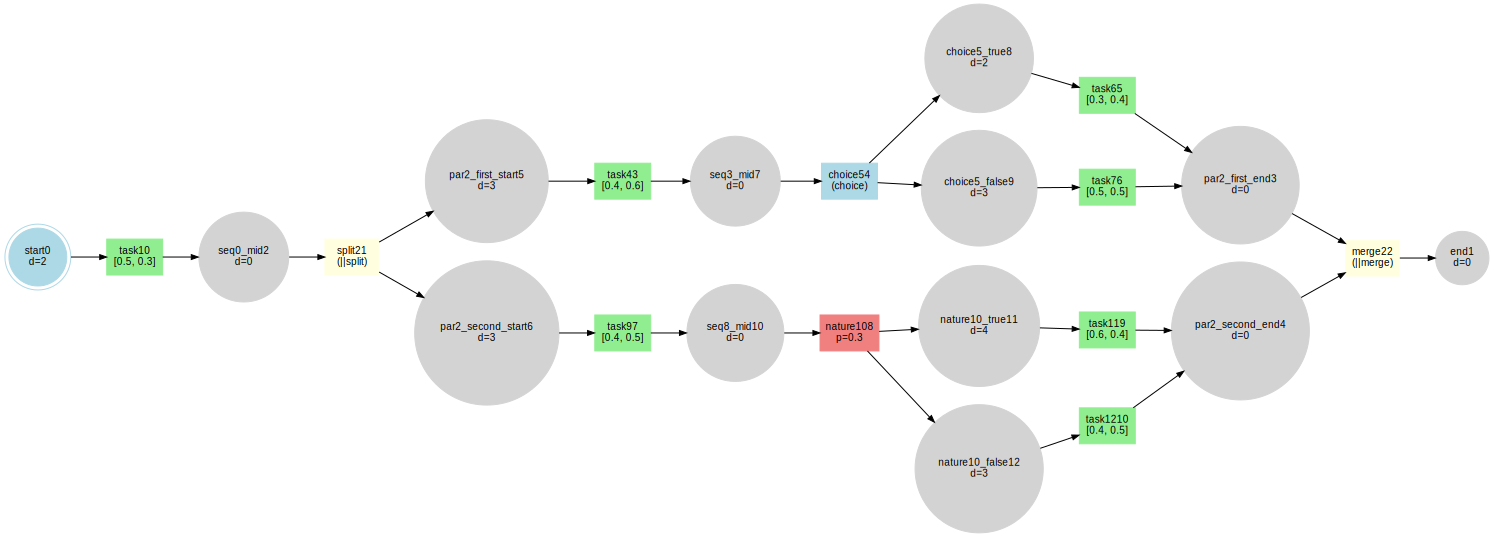

In [5]:
from cpitospin import create_cpi_visualization, create_spin_visualization

print("\nCreating visualizations...")
print("=" * 50)

try:
	# Create CPI visualization
	cpi_viz = create_cpi_visualization(cpi_dict, "CPI: Loop Example")
	print("✓ CPI visualization created")

	# Create SPIN visualization
	spin_viz = create_spin_visualization(spin_model, "SPIN: Loop Example")
	print("✓ SPIN visualization created")

	# Display visualizations (if in Jupyter)
	try:
		print("\nCPI Structure Visualization:")
		display(cpi_viz)

		print("\nSPIN Model Visualization:")
		display(spin_viz)
	except NameError:
		# Not in Jupyter, save to files instead
		print("Saving visualizations to files...")

		# Save CPI visualization
		cpi_output = process_name + '_cpi'
		cpi_viz.render(cpi_output, cleanup=True)
		print(f"CPI visualization saved to: {cpi_output}.png")

		# Save SPIN visualization
		spin_output = process_name + '_spin'
		spin_viz.render(spin_output, cleanup=True)
		print(f"SPIN visualization saved to: {spin_output}.png")

except Exception as e:
	print(f"❌ Visualization failed: {e}")
	traceback.print_exc()


# FROM SPIN TO PRISM

In [6]:
print("\nGenerating PRISM model...")
print("=" * 50)

try:
	prism_model = spin_model.generate_prism_model()

	print("✓ PRISM model generated successfully!")

	# Show model statistics
	lines = prism_model.split('\n')
	words = prism_model.split()

	print(f"Model statistics:")
	print(f"  Lines: {len(lines)}")
	print(f"  Words: {len(words)}")
	print(f"  Characters: {len(prism_model)}")

	# Show first 20 lines
	print(f"\nFirst 20 lines of PRISM model:")
	print("-" * 40)
	for i, line in enumerate(lines[:20]):
		print(f"{i + 1:2d}: {line}")

	if len(lines) > 20:
		print(f"... ({len(lines) - 20} more lines)")

except Exception as e:
	print(f"❌ PRISM generation failed: {e}")
	traceback.print_exc()

print("\nSaving PRISM model...")
print("=" * 50)

try:
	output_file =  "../models/" + process_name + '.nm'
	with open(output_file, 'w') as f:
		f.write(prism_model)

	print(f"✓ PRISM model saved to: {output_file}")

	# Verify file was created
	if os.path.exists(output_file):
		file_size = os.path.getsize(output_file)
		print(f"File size: {file_size} bytes")
	else:
		print("❌ Warning: File was not created")

except Exception as e:
	print(f"❌ Save failed: {e}")
	traceback.print_exc()


Generating PRISM model...
✓ PRISM model generated successfully!
Model statistics:
  Lines: 487
  Words: 3265
  Characters: 37194

First 20 lines of PRISM model:
----------------------------------------
 1: // Global variables for places
 2: global STAGE : [0..5] init 0;
 3: 
 4: // Place value variables
 5: global choice5_false9_value : [-1..3] init -1;
 6: global choice5_true8_value : [-1..2] init -1;
 7: global end1_value : [-1..0] init -1;
 8: global nature10_false12_value : [-1..3] init -1;
 9: global nature10_true11_value : [-1..4] init -1;
10: global par2_first_end3_value : [-1..0] init -1;
11: global par2_first_start5_value : [-1..3] init -1;
12: global par2_second_end4_value : [-1..0] init -1;
13: global par2_second_start6_value : [-1..3] init -1;
14: global seq0_mid2_value : [-1..0] init -1;
15: global seq3_mid7_value : [-1..0] init -1;
16: global seq8_mid10_value : [-1..0] init -1;
17: global start0_value : [-1..2] init 0;
18: 
19: // Place updated variables
20: global choic

## RUN PRISM ANALYSIS

In [7]:
!prism

PRISM
=====

Version: 4.8.1
Date: Wed Jun 11 09:47:11 UTC 2025
Hostname: d94718b98f4a
Memory limits: cudd=1g, java(heap)=1g
Command line: prism
Usage: prism [options] <model-file> [<properties-file>] [more-options]

For more information, type: prism -help


In [8]:
from run_prism import run_prism_analysis
run_prism_analysis(process_name)

Analysis complete. Results saved to ../results/test0/test0.info


{'timestamp': '2025-06-11T09:47:14.930889',
 'modules': ['manager',
  'choice54',
  'merge22',
  'nature108',
  'split21',
  'task10',
  'task119',
  'task1210',
  'task43',
  'task65',
  'task76',
  'task97'],
 'variables': ['STAGE',
  'choice5_false9_value',
  'choice5_true8_value',
  'end1_value',
  'nature10_false12_value',
  'nature10_true11_value',
  'par2_first_end3_value',
  'par2_first_start5_value',
  'par2_second_end4_value',
  'par2_second_start6_value',
  'seq0_mid2_value',
  'seq3_mid7_value',
  'seq8_mid10_value',
  'start0_value',
  'choice5_false9_updated',
  'choice5_true8_updated',
  'end1_updated',
  'nature10_false12_updated',
  'nature10_true11_updated',
  'par2_first_end3_updated',
  'par2_first_start5_updated',
  'par2_second_end4_updated',
  'par2_second_start6_updated',
  'seq0_mid2_updated',
  'seq3_mid7_updated',
  'seq8_mid10_updated',
  'start0_updated',
  'choice54_state',
  'merge22_state',
  'nature108_state',
  'split21_state',
  'task10_state',
  'tas

### Read output

In [9]:
from graphviz import Source
import pandas as pd

dot_filename = f"../results/{process_name}/{process_name}.dot"

with open(dot_filename, 'r', encoding='utf-8') as f: #{process_name}/{process_name}.dot
    dot_content = f.read()
    Source(dot_content).render(filename=f"../results/{process_name}/{process_name}", format='svg', cleanup=True)

states_filenames = f"../results/{process_name}/{process_name}_states.csv"
transitions_filenames = f"../results/{process_name}/{process_name}_trans.tra"

# FROM PRISM TO MDP

Since PRISM models are based on an extended form of MDPs, we now provide the compact version of the MDP generated by PRISM, which corresponds to the equivalent SPIN model. This enhances clarity and facilitates easier comparison between the two representations.

   0  1    2  3            4
0  0  0  415  1         None
1  1  0  428  1         None
2  2  0    9  1  fire_task10
3  3  0  667  1         None
4  4  0    3  1         None
(816, 5)


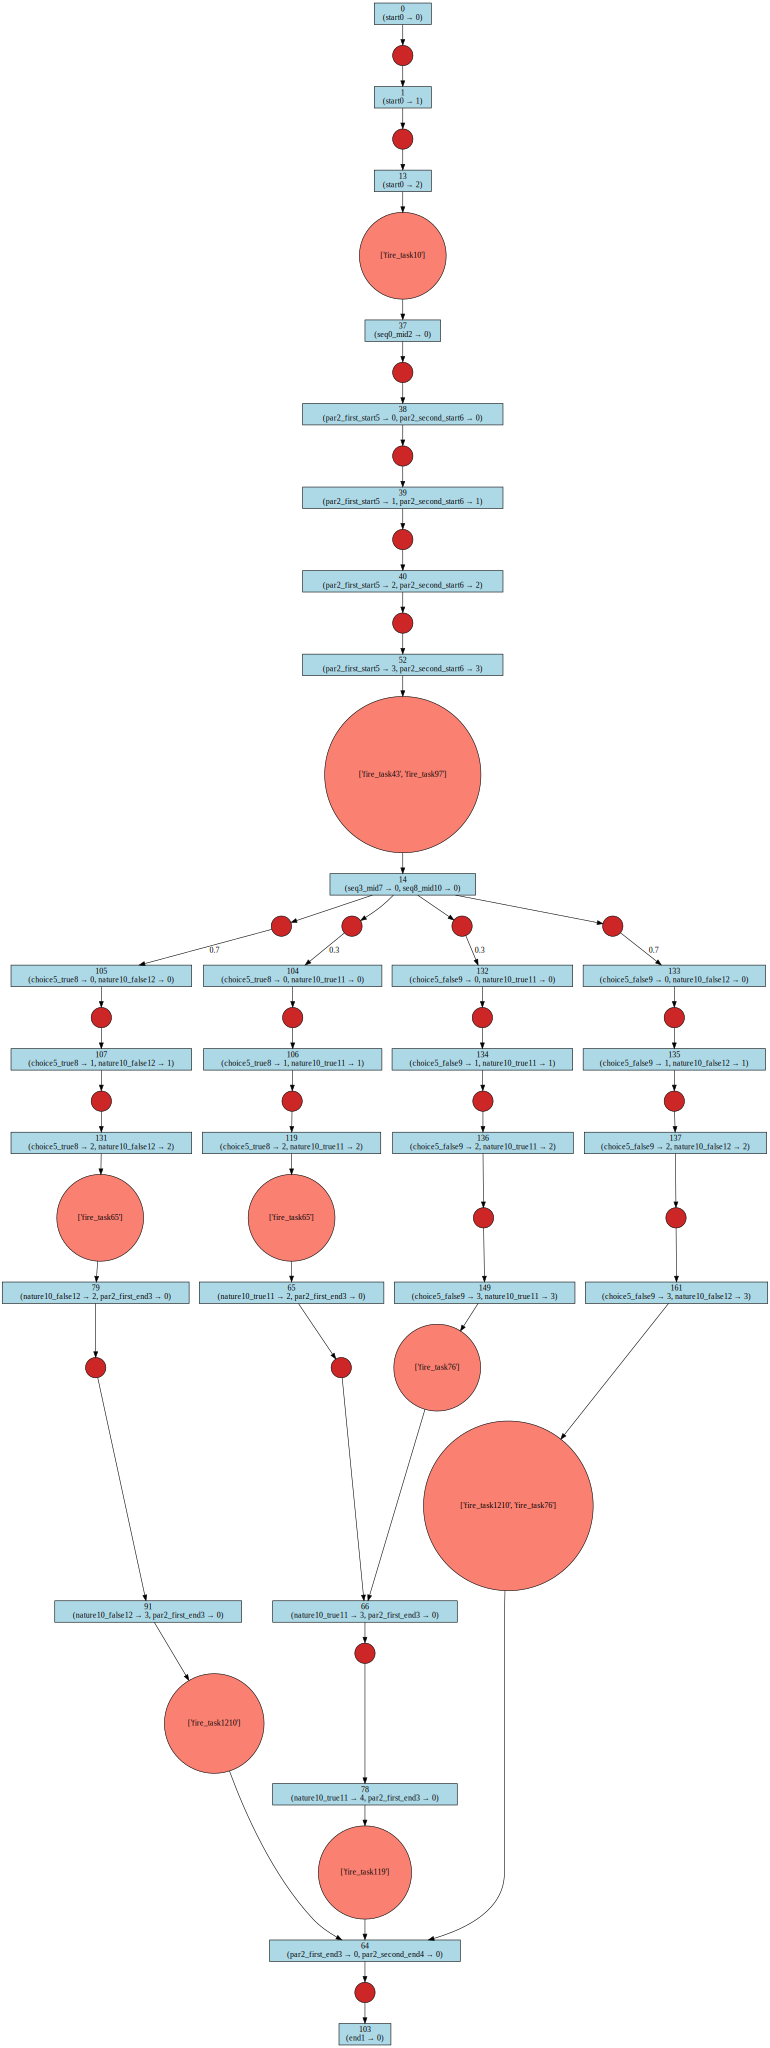

In [10]:
from graphviz import Source
import re
from collections import defaultdict
import pandas as pd

def create_states_mdp(states, transitions):
    states['STAGE'] = states['(STAGE'].apply(lambda x: x.split(':')[-1].split('(')[-1] if isinstance(x, str) else x)
    states.drop(columns=['(STAGE'], inplace=True)

    paren_cols = [col for col in states.columns if col.endswith(')')]
    for col in paren_cols:
        states[col.replace(')', '')] = states[col].apply(lambda x: x[-2] if isinstance(x, str) and len(x) >= 2 else x)
        states.drop(columns=[col], inplace=True)

    states = states.apply(pd.to_numeric)

    # Select relevant columns
    update_cols = [col for col in states.columns if col.endswith('_update')]
    state_cols = [col for col in states.columns if col.endswith('_state')]
    value_cols = [col for col in states.columns if col.endswith('_value')]

    # Identify new states
    stage_mask = states['STAGE'].isin([0])
    update_mask = (states[update_cols] == 0).all(axis=1)
    state_mask = (states[state_cols] == 0).all(axis=1)
    new_states_df = states[stage_mask & update_mask & state_mask]
    new_state_ids = new_states_df.index.astype(int).tolist() 
    new_state_set = set(new_state_ids) #set([int(nid) for nid in new_state_ids if nid not in nodes_to_remove])

    lines = ['digraph LTS {', 'node [label="", shape="box"];']

    def format_label(row):
        parts = [
            f"{col.replace('_value', '')} → {int(row[col])}"
            for col in value_cols if row[col] >= 0
        ]
        return f'{row.name} [label="{row.name}\\n(' + ", ".join(parts) + ')", style="filled", fillcolor="lightblue"];' # fillcolor="#FF0000"

    
    trans = transitions[0].str.split(expand=True)
    print(trans.head())
    print(trans.shape)
    # Check if 'prob' column exists (based on column count)
    has_prob = trans.shape[1] >= 5
    
    # Extract relevant columns
    if has_prob:
        source_dest = trans[[0, 2, 3, 4]]
        source_dest.columns = ['source', 'destination', 'prob', 'label']
    else:
        source_dest = trans[[0, 2, 3]]
        source_dest.columns = ['source', 'destination', 'label']
    # Create dictionary: {source: [(destination, prob)]} or {source: [(destination,)]}
    trans_dict = defaultdict(list)
    
    for _, row in source_dest.iterrows():
        source = int(row['source'])
        destination = int(row['destination'])
        prob = float(row['prob']) if has_prob else 1.0  # Default prob to 1.0 if missing
        label = [row['label'] ]if row['label'] else []
        trans_dict[source].append((destination, prob,label))
    
    # Optional: convert to regular dict
    trans_dict = dict(trans_dict)
    def find_next_state(src:int, trans_dict:dict, possible_targets):  
        res = []
        for i in range(len(trans_dict[src])):
            if src == trans_dict[src][i][0]:
                return [] # it's final 
            if trans_dict[src][i][0] in possible_targets:
                # print(trans_dict[src][i][0], trans_dict[src][i][1])
                res.append(trans_dict[src][i]) # questo significa che src e target sono collegati direttamente 
            
        if len(res) > 0:
            return res
        for i in range(len(trans_dict[src])): 
            # continua a cercare ma la destinazione è diventata source
            l = trans_dict[src][i][2]
            for r in find_next_state( trans_dict[src][i][0], trans_dict, possible_targets):
                l.extend(r[2])
                res.append((r[0], round(r[1] * trans_dict[src][i][1], 3), l))
            
        return res
    idx_trans = max(new_state_ids)+1    
    for idx, row in new_states_df.iterrows():
        # if str(idx) not in nodes_to_remove:
        lab = format_label(row)
        lines.append(lab) 
        targets = find_next_state(idx, trans_dict, new_state_set)
        for t in targets:
            next_idx, probability, label = t
            prob_label = f'[label = ""]'
            if probability < 1.0:
                prob_label = f'[label = "{probability}"]'
            if label and probability < 1.0:
                lines.append(f'{idx_trans} [label="{label} " , style="filled", fillcolor="green", shape="circle" ];')
            elif label:
                lines.append(f'{idx_trans} [label="{label} " , style="filled", fillcolor="salmon", shape="circle" ];')
            else:
                lines.append(f'{idx_trans} [label="∅" , style="filled", fillcolor="firebrick3", shape="circle"];')         
            
            lines.append(f'{idx} -> {idx_trans};')
            lines.append(f'{idx_trans} -> {next_idx} {prob_label}; ')
            idx_trans +=1
    lines.append('}')

    return "\n".join(lines)


states = pd.read_csv(states_filenames)
transitions = pd.read_csv(transitions_filenames, skiprows=1, header= None)

compressed_dot = create_states_mdp(states, transitions)

#print(compressed_dot)
Source(compressed_dot).render(filename=f"../results/{process_name}/{process_name}_cleaned", format='svg', cleanup=True)
Source(compressed_dot)

In [11]:
states

,choice5_false9_value,choice5_true8_value,end1_value,nature10_false12_value,nature10_true11_value,par2_first_end3_value,par2_first_start5_value,par2_second_end4_value,par2_second_start6_value,seq0_mid2_value,...,nature108_state,split21_state,task10_state,task119_state,task1210_state,task43_state,task65_state,task76_state,STAGE,task97_state
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,0,0,0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,0,1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,-1,0,-1,-1,0,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,5,0
809,-1,0,-1,0,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,5,0
810,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,0,0,0,0,0,0,0,5,0
811,0,-1,-1,-1,0,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,5,0


In [12]:
transitions

,0
0,0 0 415 1
1,1 0 428 1
2,2 0 9 1 fire_task10
3,3 0 667 1
4,4 0 3 1
...,...
811,809 0 105 1
812,810 0 811 0.3
813,810 0 812 0.7
814,811 0 132 1
